### Task 6.5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
path = r'/Users/hannahstrassmann/Desktop/Achievment four Project/two Data'

In [3]:
# Importing df_ords_prods_merge
df_ords_prods_current = pd.read_pickle(os.path.join(path, 'Prepared Data', 'ords_prods_current.pkl'))

In [4]:
df_ords_prods_current.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest day,busiest_days_loc,busiest_period_of_day,max_order,loyalty_flag,spending_habits,spending flag,ordering_frequency,order_frequency_flag,busiest_period_of_day_2
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2


In [5]:
# Remove max columns display
pd.set_option('display.max_columns', None)

In [6]:
df_ords_prods_current.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days_loc,busiest_period_of_day,max_order,loyalty_flag,spending_habits,spending flag,ordering_frequency,order_frequency_flag,busiest_period_of_day_2
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,mid-range product,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,mid-range product,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,low-range product,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,low-range product,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,low-range product,regular busy,regular busy days,average orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,average orders 2


In [7]:
df_ords_prods_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 25 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   user_id                  int64   
 2   order_number             int64   
 3   orders_day_of_week       int64   
 4   order_time               int64   
 5   days_since_prior_order   float64 
 6   product_id               int64   
 7   add_to_cart_order        int64   
 8   reordered                int64   
 9   product_name             object  
 10  aisle_id                 int64   
 11  department_id            int64   
 12  prices                   float64 
 13  _merge                   category
 14  price_range_loc          object  
 15  busiest day              object  
 16  busiest_days_loc         object  
 17  busiest_period_of_day    object  
 18  max_order                int64   
 19  loyalty_flag             object  
 20  spending_habits       

In [37]:
# Create df with only numerical variables
df_numvar = df_ords_prods_current [['order_number','orders_day_of_week', 'order_time', 'product_id', 'user_id', 'add_to_cart_order', 'reordered', 'aisle_id', 'department_id', 'prices', 'max_order', 'spending_habits']] 

In [39]:
df_numvar.head()

,order_number,orders_day_of_week,order_time,product_id,user_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,spending_habits
0,1,2,8,196,1,1,0,77,7,9.0,10,6.367797
1,1,2,8,14084,1,2,0,91,16,12.5,10,6.367797
2,1,2,8,12427,1,3,0,23,19,4.4,10,6.367797
3,1,2,8,26088,1,4,0,23,19,4.7,10,6.367797
4,1,2,8,26405,1,5,0,54,17,1.0,10,6.367797


In [41]:
df_numvar.isnull().sum()

order_number             0
orders_day_of_week       0
order_time               0
product_id               0
user_id                  0
add_to_cart_order        0
reordered                0
aisle_id                 0
department_id            0
prices                4429
max_order                0
spending_habits          0
dtype: int64

In [43]:
df_numvarclean = df_numvar[df_numvar['prices'].isnull() == False]

In [45]:
df_numvarclean.isnull().sum()

order_number          0
orders_day_of_week    0
order_time            0
product_id            0
user_id               0
add_to_cart_order     0
reordered             0
aisle_id              0
department_id         0
prices                0
max_order             0
spending_habits       0
dtype: int64

## The Elbow technique

In [49]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [51]:
score = [kmeans[i].fit(df_numvarclean).score(df_numvarclean) for i in range(len(kmeans))]

score

[-1.2100297168071638e+17,
 -3.5057880349101184e+16,
 -1.916343510157341e+16,
 -1.3595519417965436e+16,
 -1.0989053474314508e+16,
 -9620824063243746.0,
 -8711518557373280.0,
 -7772688051149588.0,
 -6872793514088240.0]

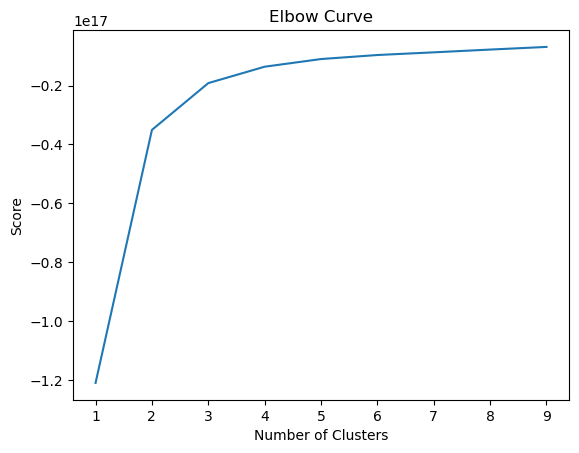

In [53]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve becomes much flatter after the point 3 on the x-acis, so I will do 3 clusters.

In [56]:
# Createing k-means object
kmeans = KMeans(n_clusters = 3)

In [60]:
# Fit the k-means object to the data.
kmeans.fit(df_numvarclean)

KMeans(n_clusters=3)

In [62]:
df_numvarclean['clusters'] = kmeans.fit_predict(df_numvarclean)

/var/folders/pb/ntsf5rfn1rs9pmdn1yzhjxnw0000gn/T/ipykernel_47564/1105446077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numvarclean['clusters'] = kmeans.fit_predict(df_numvarclean)


In [64]:
df_numvarclean.head()

,order_number,orders_day_of_week,order_time,product_id,user_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,spending_habits,clusters
0,1,2,8,196,1,1,0,77,7,9.0,10,6.367797,2
1,1,2,8,14084,1,2,0,91,16,12.5,10,6.367797,2
2,1,2,8,12427,1,3,0,23,19,4.4,10,6.367797,2
3,1,2,8,26088,1,4,0,23,19,4.7,10,6.367797,2
4,1,2,8,26405,1,5,0,54,17,1.0,10,6.367797,2


In [66]:
df_numvarclean['clusters'].value_counts()

clusters
1    10902579
0    10776228
2    10721623
Name: count, dtype: int64

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


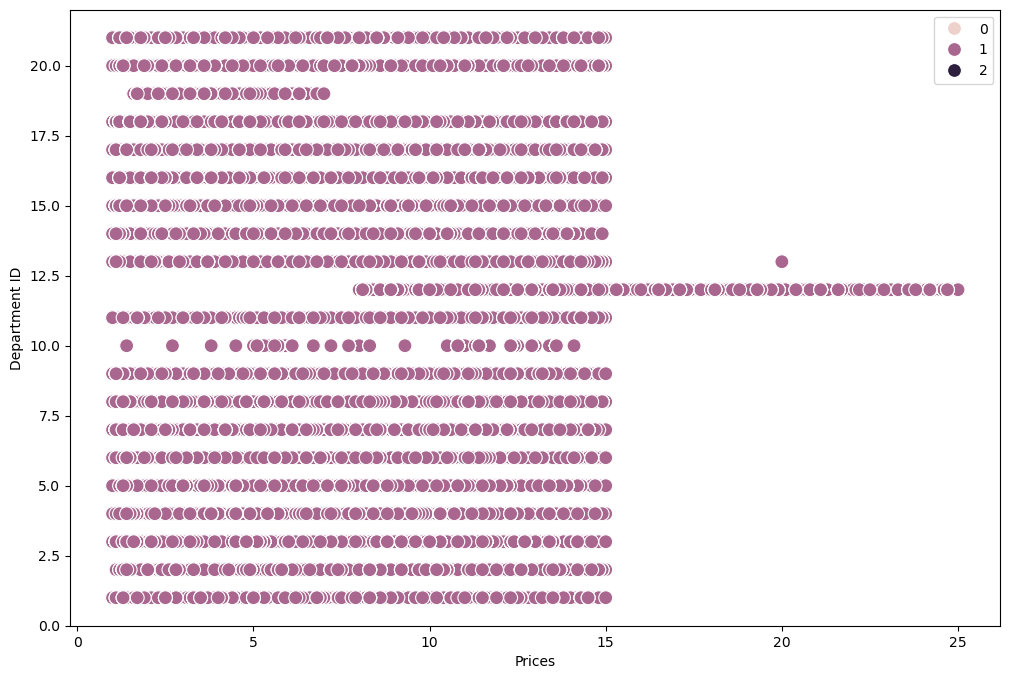

In [70]:
# Plot the clusters for 'prices' and 'department_id'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numvarclean['prices'], y=df_numvarclean['department_id'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Prices') 
plt.ylabel('Department ID')
plt.show()

I can't run more, because this already took about 10 minutes and used a lot of memory of my computer. I am confused as to why there are only purple dots though...

In [72]:
df_numvarclean.loc[df_numvarclean['clusters'] == 2, 'cluster'] = 'dark purple'
df_numvarclean.loc[df_numvarclean['clusters'] == 1, 'cluster'] = 'purple'
df_numvarclean.loc[df_numvarclean['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/pb/ntsf5rfn1rs9pmdn1yzhjxnw0000gn/T/ipykernel_47564/4117301864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numvarclean.loc[df_numvarclean['clusters'] == 2, 'cluster'] = 'dark purple'


In [74]:
df_numvarclean.groupby('cluster').agg({'order_number':['mean', 'median'], 
                         'orders_day_of_week':['mean', 'median'], 
                         'order_time':['mean', 'median'],
                         'user_id':['mean', 'median'],
                         'add_to_cart_order':['mean', 'median'],
                         'reordered':['mean', 'median'],
                         'aisle_id':['mean', 'median'],
                         'department_id':['mean', 'median'],
                         'prices':['mean', 'median'],
                         'max_order':['mean', 'median'],
                         'spending_habits':['mean', 'median'],
                          'product_id':['mean', 'median']})



order_number        orders_day_of_week        order_time         \
                    mean median               mean median       mean median   
cluster                                                                       
dark purple    17.148551   11.0           2.741091    3.0  13.422808   13.0   
pink           17.085306   11.0           2.738648    3.0  13.431955   13.0   
purple         17.193139   11.0           2.736901    3.0  13.420687   13.0   

                   user_id           add_to_cart_order        reordered  \
                      mean    median              mean median      mean   
cluster                                                                   
dark purple   34135.349626   34078.0          8.338447    6.0  0.590418   
pink         102139.250267  102020.0          8.363492    6.0  0.588291   
purple       171385.057400  171523.0          8.355655    6.0  0.590042   

                     aisle_id        department_id           prices         \
            median       mean median          mean median      mean median   
cluster                                                                      
dark purple    1.0  71.174650   83.0      9.923146    9.0  7.790394    7.4   
pink           1.0  71.233515   83.0      9.914643    9.0  7.792250    7.4   
purple         1.0  71.165309   83.0      9.919113    9.0  7.790474    7.4   

             max_order        spending_habits              product_id           
                  mean median            mean    median          mean   median  
cluster                                                                         
dark purple  33.087983   26.0        9.626198  7.817737  25592.844091  25272.0  
pink         32.930072   26.0        9.847537  7.826288  25602.920375  25340.0  
purple       33.138494   26.0        9.858149  7.825210  25601.817035  25305.0

Well, I have to say I am a little disappointed. i thought this would be more interesting than using my data. But basically it si nothing. Maybe therea re too many variables that have no relationship or are measured on different scales or some other reason. if I woudl do more research wiht this data set I would probaly use a subset so I can run more analysis faster.